# I. IMDB MOVIE REVIEW CLASSIFICATION WITH BERT: HOW TO USE BERT TOKENIZER

## How to load the data using kaggle api

In [20]:
! mkdir -p ~/.kaggle/
! cp kaggle.json ~/.kaggle/

In [21]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 35% 9.00M/25.7M [00:00<00:01, 17.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 43.9MB/s]


In [22]:
! unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [23]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## We will briefly cover bert and how it works

In [3]:
!pip install pytorch-pretrained-bert
!pip install transformers

     |████████████████████████████████| 133kB 7.9MB/s 
     |████████████████████████████████| 757kB 8.0MB/s 
     |████████████████████████████████| 890kB 23.7MB/s 
     |████████████████████████████████| 3.0MB 43.7MB/s 
     |████████████████████████████████| 1.1MB 44.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=d90644c2fdee0c70c0192d43e8c473983c0835887a97e1d77157bb68a61b380c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
import torch
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [11]:
with open('vocabulary.txt','w') as f:
  for eachtoken in tokenizer.vocab.keys():
    f.write(eachtoken+'\n')

We can see that: 
- 1 - [PAD]
- 101 - [UNK]
- 102 - [CLS]
- 103 - [SEP]
- 104 - [MASK]

* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

In [12]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [13]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Maximum token length: 18


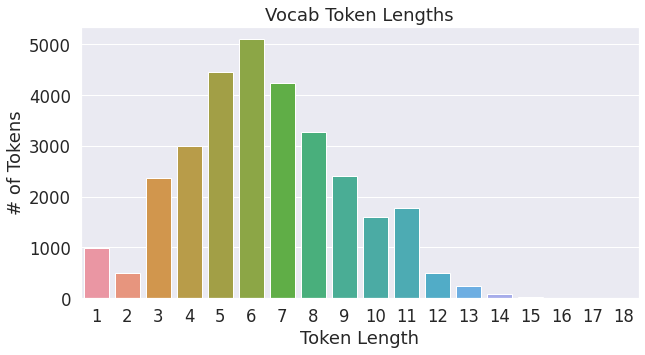

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Steps for using **BERT** tokenizers:
1. [CLS] in the beginning and [SEP] in the end
2. **padding** so that each sentence has the same length
3. **attension mask** for all the tokens(1 for all tokens and 0 for paddings)

![Illustration of CLS token purpose](http://www.mccormickml.com/assets/BERT/CLS_token_500x606.png)

<img src="http://www.mccormickml.com/assets/BERT/padding_and_mask.png" width="600">

ref: https://www.chrismccormick.ai/

In [2]:
sentence = 'This is what we do every day: becoming successful'

In [5]:
# Print the original sentence.
print(' Original: ', sentence)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentence))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence)))

 Original:  This is what we do every day: becoming successful
Tokenized:  ['this', 'is', 'what', 'we', 'do', 'every', 'day', ':', 'becoming', 'successful']
Token IDs:  [2023, 2003, 2054, 2057, 2079, 2296, 2154, 1024, 3352, 3144]


In [15]:
input_ids = []
attention_masks = []

In [17]:
     # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
encoded_dict = tokenizer.encode_plus(
                        sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
input_ids.append(encoded_dict['input_ids'])
attention_masks.append(encoded_dict['attention_mask'])
print('Original: ', sentence)
print('Token IDs:', input_ids[0])


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.


Original:  This is what we do every day: becoming successful
Token IDs: tensor([[ 101, 2023, 2003, 2054, 2057, 2079, 2296, 2154, 1024, 3352, 3144,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]])


In [19]:
print('The attention mask is: ', attention_masks[0])

The attention mask is:  tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
